### Extracting the patches, embedding data and running through a toy ansatz

In [1]:
import numpy as np
import torch
import torch.nn as nn 
import torch.utils.data as data
import torch.optim as optim
import torchvision.transforms as transforms
from medmnist import INFO, Evaluator, BreastMNIST
import medmnist
import math

In [2]:
data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

train_dataset = DataClass(split='train', transform=data_transform, download=download, size=224, mmap_mode='r')

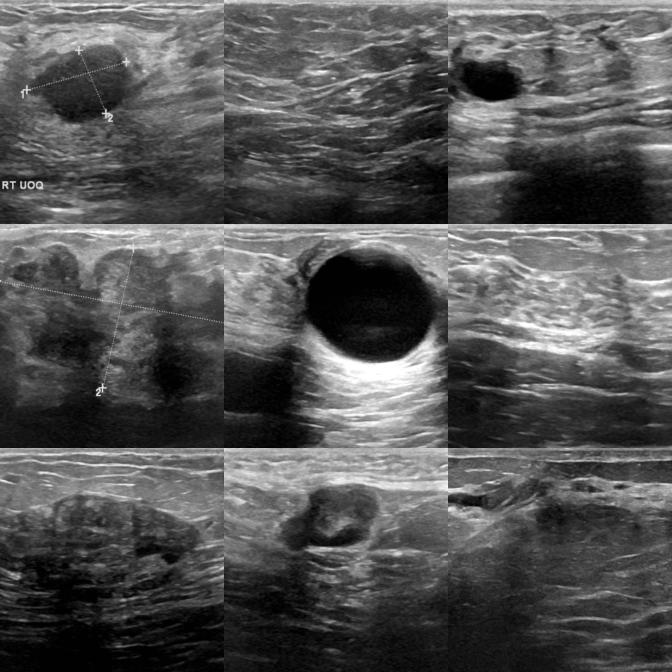

In [3]:
train_dataset.montage(length=3)

In [4]:
image = train_dataset.imgs[0]
no_patches = 1
patch_size = 2
enconding = []
for row in range(patch_size):
    for column in range(patch_size):
        enconding.append(math.pi * image[row][column]/255)


In [5]:
enconding_tensor = torch.tensor(enconding)

In [13]:
from quantum_circuit_tensor import AnsatzSimulation

my_ansatz = AnsatzSimulation(n_qubits=4)
state_vector = my_ansatz.angle_embedding(enconding_tensor, 'rz')
state_vector

tensor([-0.7473+0.6645j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
         0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
         0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
         0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j])

In [7]:
def run_gate(state_vector, gate):
    ra